**DataSet**:

**Montgomery County X-ray Set**: Hình ảnh X-ray trong Dataset này được thu thập từ chương trình kiểm soát bệnh lao của Bộ Y tế và Dịch vụ Nhân sinh của Hạt Montgomery, MD, Hoa Kỳ. Dataset này gồm 138 hình X-ray chụp sau - trước, trong đó 80 hình normal và 58 hình abnormal có biểu hiện của bệnh lao. Tất cả hình ảnh đều được khử nhận dạng và có sẵn ở định dạng DICOM. 

**Shenzhen Hospital X-ray Set:** Hình ảnh chụp X-quang trong tập dữ liệu này đã được Bệnh viện số 3 Thâm Quyến ở Thâm Quyến, tỉnh Quảng Đông, Trung Quốc thu thập.  Bộ ảnh có định dạng JPEG. Có 326 hình chụp X-quang normal và 336 lần X-quang normal cho thấy các biểu hiện khác nhau của bệnh lao.

# **IMPORT LIBRARIES**

In [1]:
import os

import numpy as np
import cv2
import matplotlib.pyplot as plt

from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras import backend as keras
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, LearningRateScheduler

from glob import glob
from tqdm import tqdm
from keras.models import load_model

# **Load Data**

(3072, 3072, 3)


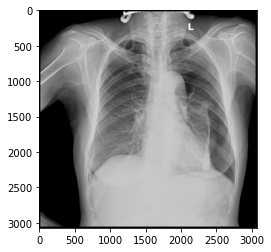

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Vin Deep Learning/train/020717d6ab0b440b37978d9bace9f9b2.png')

print(img.shape)
plt.imshow(img,cmap=plt.cm.gray)
plt.show()

In [ ]:
dim = (1024,1024)
re_img = cv2.resize(img, dim)
re_img = re_img.reshape(-1,1024,1024,3)
#re_img =re_img/255

In [ ]:
def load_image(path):
  img = cv2.imread(path)
  

In [ ]:
def Image_Processing(image):
  dim = (1024,1024)
  re_img = cv2.resize(img, dim)
  re_img = re_img.reshape(-1,1024,1024,3)
  return re_img

# **Load Model**

In [ ]:
path = "/content/drive/MyDrive/Vin Deep Learning/Demo  Montgomery County and Shenzhen Hospital/model/best_model.h5"
UnetModel = load_model(path, compile=False)

In [ ]:
UnetModel.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               [(None, 1024, 1024,  0                                            
__________________________________________________________________________________________________
bn_data (BatchNormalization)    (None, 1024, 1024, 3 9           data[0][0]                       
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 1030, 1030, 3 0           bn_data[0][0]                    
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, 512, 512, 64) 9408        zero_padding2d_1[0][0]           
____________________________________________________________________________________________

In [ ]:
len(UnetModel.layers)

306

In [ ]:
img_predict  = UnetModel.predict(re_img)

In [ ]:
img_predict

array([[[[1.46024525e-02],
         [9.16182995e-04],
         [4.22924757e-04],
         ...,
         [3.65346670e-04],
         [7.58260489e-04],
         [7.13095069e-03]],

        [[1.77371502e-03],
         [6.61127924e-05],
         [2.84833932e-05],
         ...,
         [2.04419939e-05],
         [6.70149602e-05],
         [1.49217248e-03]],

        [[9.28223133e-04],
         [6.77403368e-05],
         [2.42460846e-05],
         ...,
         [3.39667095e-05],
         [2.08245310e-05],
         [4.21524048e-04]],

        ...,

        [[9.33915377e-04],
         [1.59805240e-05],
         [3.09680945e-05],
         ...,
         [1.43853731e-05],
         [2.94487127e-05],
         [7.85112381e-04]],

        [[6.74784184e-04],
         [6.64763866e-05],
         [9.25413769e-06],
         ...,
         [2.70694673e-05],
         [9.97756979e-06],
         [6.01500273e-04]],

        [[6.72960281e-03],
         [6.55710697e-04],
         [3.41832638e-04],
         ...,
 

In [ ]:
img_predict = img_predict.reshape(1024,1024,1)
#img_predict = (img_predict[:, :, 0] * 255.).astype(np.uint8)
img_predict = (img_predict*255).astype(np.uint8)

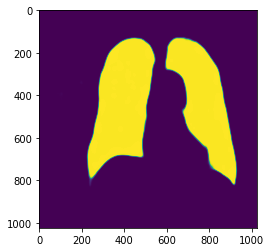

In [ ]:
plt.imshow(img_predict[:,:,0]) #cmap="Reds"

In [ ]:
def mask_processing(img,path):
  img_predict  = UnetModel.predict(img)
  img_predict = img_predict.reshape(1024,1024,1)
  img_predict = (img_predict*255).astype(np.uint8)
  cv2.imwrite(path, img_predict)

# Predict on Motergery Datasets


In [ ]:
mask_path = "/content/drive/MyDrive/Vin Deep Learning/Demo  Montgomery County and Shenzhen Hospital/data/Montgomery Predicted Masks/"
image_path = "/content/drive/MyDrive/Vin Deep Learning/Demo  Montgomery County and Shenzhen Hospital/data/NLM-MontgomeryCXRSet/MontgomerySet/CXR_png/"

In [ ]:
images = os.listdir(image_path)
mask = [fName.split(".png")[0] for fName in images] #cut .png in images to repair for mask name
len(images)

139

In [ ]:
image_path_name = [image_path + fName for fName in images] #cut .png in images to repair for mask name
image_path_name[0]

'/content/drive/MyDrive/Vin Deep Learning/Demo  Montgomery County and Shenzhen Hospital/data/NLM-MontgomeryCXRSet/MontgomerySet/CXR_png/MCUCXR_0001_0.png'

In [ ]:
path_image1 = mask_path + image_path_name[0].replace(image_path,'')
path_image1

'/content/drive/MyDrive/Vin Deep Learning/Demo  Montgomery County and Shenzhen Hospital/data/Montgomery Predicted Masks/MCUCXR_0001_0.png'

In [ ]:
mask_processing(re_img,path_image1)

In [ ]:
for path in image_path_name:
  img = cv2.imread(path)
  re_img = Image_Processing(img)
  path_image = mask_path + path.replace(image_path,'')
  mask_processing(re_img,path_image)

In [ ]:
masks = os.listdir(mask_path)
len(masks)

138

# EVALUATION ON MONGOMERY DATASETS GROUND TRUTH

## Prepare data


In [ ]:
left_mask_path = "/content/drive/MyDrive/Vin Deep Learning/Demo  Montgomery County and Shenzhen Hospital/data/NLM-MontgomeryCXRSet/MontgomerySet/ManualMask/leftMask/"
right_mask_path = "/content/drive/MyDrive/Vin Deep Learning/Demo  Montgomery County and Shenzhen Hospital/data/NLM-MontgomeryCXRSet/MontgomerySet/ManualMask/rightMask/"


In [ ]:
left_masks = os.listdir(left_mask_path)
right_masks = os.listdir(right_mask_path)
left_masks.sort()
right_masks.sort()

In [ ]:
#xử lý mask #merge 2 mask left right lại với nhau
dim = (1024,1024)
mask = "/content/drive/MyDrive/Vin Deep Learning/Demo  Montgomery County and Shenzhen Hospital/data/NLM-MontgomeryCXRSet/MontgomerySet/mask/"
for i in range(len(left_masks)):
  left_mask = cv2.imread(left_mask_path + left_masks[i], cv2.IMREAD_GRAYSCALE)
  right_mask = cv2.imread(right_mask_path + right_masks[i], cv2.IMREAD_GRAYSCALE)
  #left_mask = cv2.resize(left_mask,(4892,4020))
  #right_mask = cv2.resize(right_mask,(4892,4020))
  if (left_masks[i] == right_masks[i]):
    total_mask = left_mask + right_mask
    total_mask = cv2.resize(total_mask, dim)
    cv2.imwrite(mask + left_masks[i],total_mask)

In [ ]:
left_mask = cv2.imread(left_mask_path + left_masks[2], cv2.IMREAD_GRAYSCALE)
right_mask = cv2.imread(right_mask_path + right_masks[2], cv2.IMREAD_GRAYSCALE)

t_mask= left_mask + right_mask
total_mask = cv2.resize(t_mask, (1024,1024))

print(left_mask.shape)
print(right_mask.shape)
print(total_mask.shape)


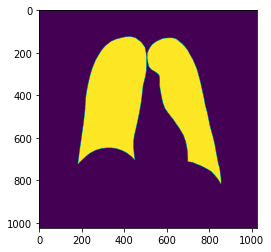

In [ ]:
plt.imshow(total_mask)

In [ ]:
len(left_masks)
len(right_masks)
len(os.listdir(mask))

138

## Evaluation 

In [2]:
predict_mask_path = "/content/drive/MyDrive/Vin Deep Learning/Demo  Montgomery County and Shenzhen Hospital/data/Montgomery Predicted Masks/"
ground_truth_path = "/content/drive/MyDrive/Vin Deep Learning/Demo  Montgomery County and Shenzhen Hospital/data/NLM-MontgomeryCXRSet/MontgomerySet/mask/"
xray_image_path = "/content/drive/MyDrive/Vin Deep Learning/Demo  Montgomery County and Shenzhen Hospital/data/NLM-MontgomeryCXRSet/MontgomerySet/CXR_png/"

In [4]:
diff_image_path = "/content/drive/MyDrive/Vin Deep Learning/Demo  Montgomery County and Shenzhen Hospital/data/NLM-MontgomeryCXRSet/MontgomerySet/Diff image/"

In [5]:
def Read_Folder(predict_mask_path,ground_truth_path,xray_image_path,diff_image_path):
  predict_masks = os.listdir(predict_mask_path)
  ground_truths = os.listdir(ground_truth_path)
  xray_images = os.listdir(xray_image_path)
  diff_image = os.listdir(diff_image_path)
  predict_masks.sort()
  ground_truths.sort()
  xray_images.sort()
  diff_image.sort()
  return predict_masks,ground_truths,xray_images,diff_image

In [8]:
predict_mask = cv2.imread(predict_mask_path + predict_masks[2], cv2.IMREAD_GRAYSCALE)
ground_truth = cv2.imread(ground_truth_path + ground_truths[2], cv2.IMREAD_GRAYSCALE)
xray_image = cv2.imread(xray_image_path + xray_images[2], cv2.IMREAD_GRAYSCALE)
#predict_mask = cv2.resize(predict_mask,xray_image.shape)
#ground_truth = cv2.resize(ground_truth, xray_image.shape)
xray_image = cv2.resize(xray_image, (1024,1024))
print(predict_masks[2])
print(ground_truths[2])
print(xray_images[2])
print(predict_mask.shape)
print(ground_truth.shape)
print(xray_image.shape)


MCUCXR_0003_0.png
MCUCXR_0003_0.png
MCUCXR_0003_0.png
(1024, 1024)
(1024, 1024)
(1024, 1024)


In [ ]:
predict_mask = cv2.resize(predict_mask,(4892, 4020))
print(predict_mask.shape)


(4020, 4892)


In [ ]:
def show_image(xray_image,ground_truth,predict_mask,path):
  plt.imshow(xray_image, cmap="bone")
  plt.imshow(ground_truth, cmap="Blues", alpha = 0.4)
  plt.imshow(predict_mask, cmap = "Reds", alpha = 0.4)
  plt.axis("off")
  plt.savefig(path)

In [ ]:
def Diff_Image(predict_mask_path, ground_truth_path, xray_image_path,diff_image_path ):
  predict_masks,ground_truths,xray_images = Read_Folder(predict_mask_path,ground_truth_path,xray_image_path)
  for i in range(len(xray_images)):
    predict_mask = cv2.imread(predict_mask_path + predict_masks[i], cv2.IMREAD_GRAYSCALE)
    ground_truth = cv2.imread(ground_truth_path + ground_truths[i], cv2.IMREAD_GRAYSCALE)
    xray_image = cv2.imread(xray_image_path + xray_images[i], cv2.IMREAD_GRAYSCALE)
    xray_image = cv2.resize(xray_image, (1024,1024))
    if (predict_masks[i] != xray_images[i]) or (ground_truths[i] != xray_images[i]):
      print("Diff name!", i)
      break
    else:
      if (predict_mask.shape!=xray_image.shape) or (ground_truth.shape!=xray_image.shape):
        print("Diff shape",i)
      path = diff_image_path + xray_images[i]
      show_image(xray_image,ground_truth,predict_mask,path)

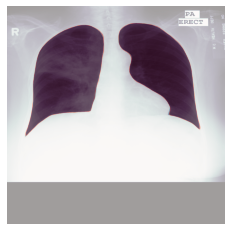

In [ ]:
Diff_Image(predict_mask_path, ground_truth_path, xray_image_path,diff_image_path)

In [7]:
predict_masks,ground_truths,xray_images,diff_images = Read_Folder(predict_mask_path,ground_truth_path,xray_image_path,diff_image_path)

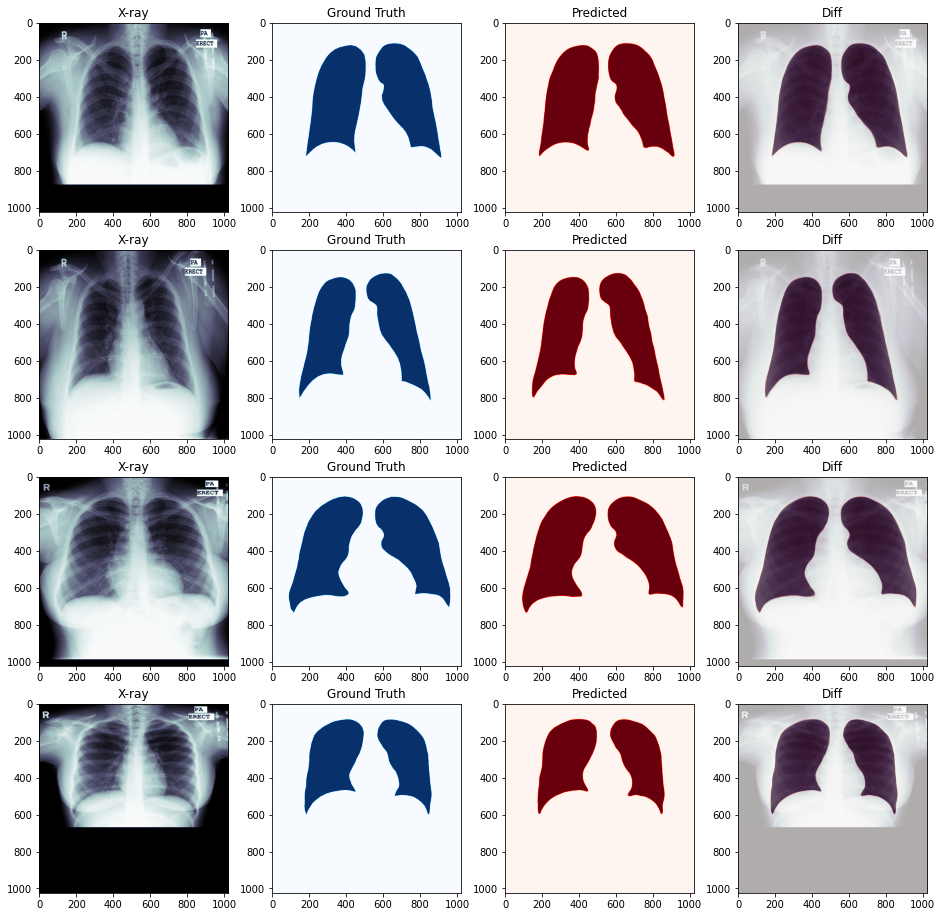

In [ ]:
fig, axs = plt.subplots(4, 4, figsize=(16, 16))
for i in range(4):
    predict_mask = cv2.imread(predict_mask_path + predict_masks[i], cv2.IMREAD_GRAYSCALE)
    ground_truth = cv2.imread(ground_truth_path + ground_truths[i], cv2.IMREAD_GRAYSCALE)
    xray_image = cv2.imread(xray_image_path + xray_images[i], cv2.IMREAD_GRAYSCALE)
    diff_image = cv2.imread(diff_image_path + diff_images[i])
    xray_image = cv2.resize(xray_image, (1024,1024))
    diff_image = cv2.resize(diff_image,(1024,1024))
    if (predict_masks[i] != xray_images[i]) or (ground_truths[i] != xray_images[i]):
      print("Diff name!", i)
      break
    else:
      axs[i, 0].set_title("X-ray")
      axs[i, 0].imshow(xray_image, cmap = "bone")
      axs[i, 1].set_title("Ground Truth")
      axs[i, 1].imshow(ground_truth, cmap = "Blues")
      axs[i, 2].set_title("Predicted")
      axs[i, 2].imshow(predict_mask, cmap = "Reds")
      axs[i, 3].set_title("Diff")
      axs[i, 3].imshow(xray_image,cmap = "bone")
      axs[i, 3].imshow(ground_truth, cmap = "Blues",alpha = 0.5)
      axs[i, 3].imshow(predict_mask, cmap = "Reds", alpha = 0.4)

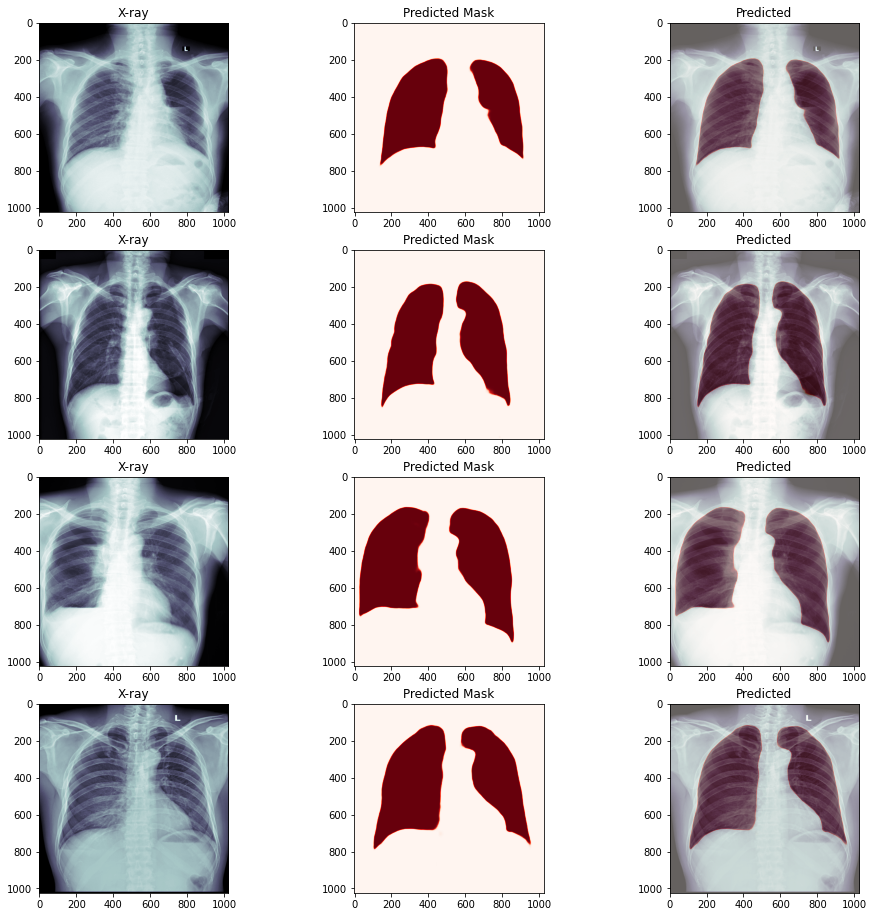

In [ ]:
path = "/content/drive/MyDrive/Vin Deep Learning/train/"
mask_path = "/content/drive/MyDrive/Vin Deep Learning/mask/"
Vin_image = os.listdir(path)
masks = os.listdir(mask_path)
Vin_image.sort()
masks.sort()
fig, axs = plt.subplots(4, 3, figsize=(16, 16))
for i in range(4):
  V_image = cv2.imread(path+Vin_image[i+8], cv2.IMREAD_GRAYSCALE)
  V_image = cv2.resize(V_image,(1024,1024))
  predict_mask = cv2.imread(mask_path+masks[i+8], cv2.IMREAD_GRAYSCALE)
  axs[i, 0].set_title("X-ray")
  axs[i, 0].imshow(V_image, cmap = "bone")
  axs[i, 1].set_title("Predicted Mask")
  axs[i, 1].imshow(predict_mask, cmap = "Reds")
  axs[i, 2].set_title("Predicted")
  axs[i, 2].imshow(V_image, cmap = "bone")
  axs[i, 2].imshow(predict_mask, cmap = "Reds", alpha = 0.4)
  

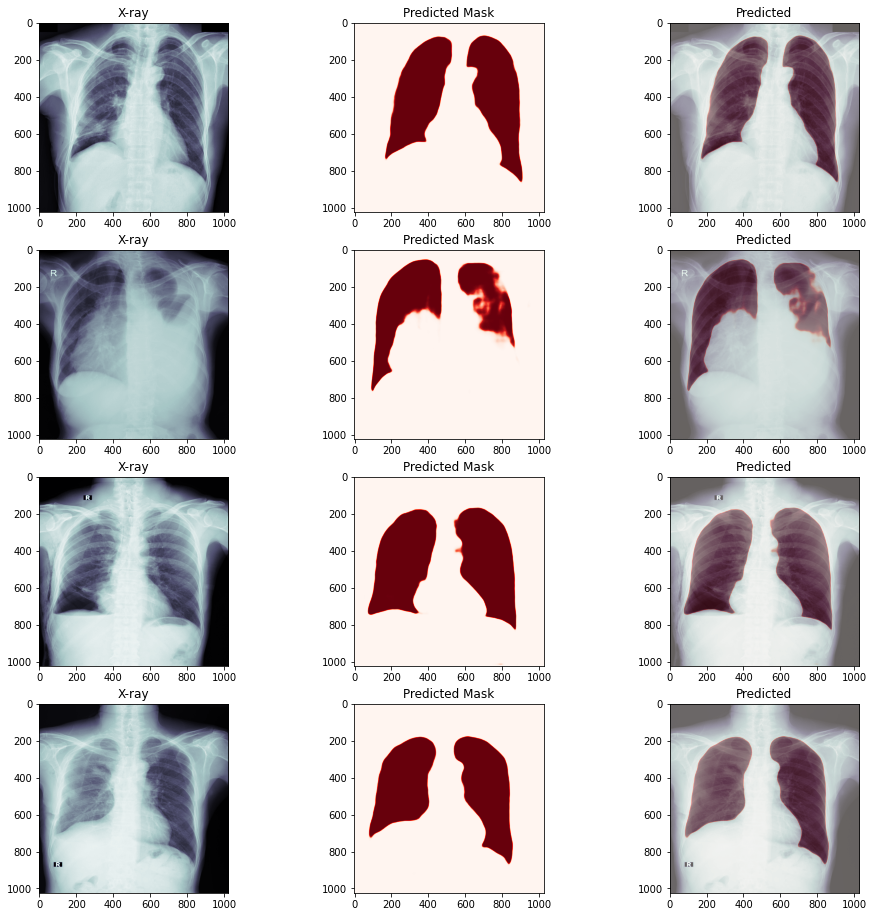

In [ ]:
path = "/content/drive/MyDrive/Vin Deep Learning/train/"
mask_path = "/content/drive/MyDrive/Vin Deep Learning/mask/"
Vin_image = os.listdir(path)
masks = os.listdir(mask_path)
Vin_image.sort()
masks.sort()
fig, axs = plt.subplots(4, 3, figsize=(16, 16))
for i in range(4):
  V_image = cv2.imread(path+Vin_image[i+12], cv2.IMREAD_GRAYSCALE)
  V_image = cv2.resize(V_image,(1024,1024))
  predict_mask = cv2.imread(mask_path+masks[i+12], cv2.IMREAD_GRAYSCALE)
  axs[i, 0].set_title("X-ray")
  axs[i, 0].imshow(V_image, cmap = "bone")
  axs[i, 1].set_title("Predicted Mask")
  axs[i, 1].imshow(predict_mask, cmap = "Reds")
  axs[i, 2].set_title("Predicted")
  axs[i, 2].imshow(V_image, cmap = "bone")
  axs[i, 2].imshow(predict_mask, cmap = "Reds", alpha = 0.4)
  

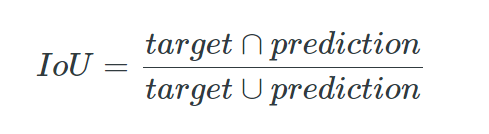

In [ ]:
def iou_score(ground_truth,predict_mask):
  intersection = np.logical_and(ground_truth, predict_mask)
  union = np.logical_or(ground_truth, predict_mask)
  iou_score = np.sum(intersection) / np.sum(union)
  return iou_score

IOU_Scoure = []
for i in range(len(predict_masks)):
  predict_mask = cv2.imread(predict_mask_path + predict_masks[i], cv2.IMREAD_GRAYSCALE)
  ground_truth = cv2.imread(ground_truth_path + ground_truths[i], cv2.IMREAD_GRAYSCALE)
  IOU_Scoure.append(iou_score(normalize(ground_truth),normalize(predict_mask)))

print(IOU_Scoure)
print(sum(IOU_Scoure)/len(predict_masks))

[0.9316040159109924, 0.9087216015213774, 0.9341019226395619, 0.9348682126099486, 0.9363909174486982, 0.9306716573092119, 0.9376801176066782, 0.9453462310590436, 0.9383550508458043, 0.938511617869218, 0.9373748567061521, 0.918204931051707, 0.9450164628850972, 0.9413974406041853, 0.9307021382323056, 0.9457191202886766, 0.9483571581964687, 0.9265086841330585, 0.9306821320077326, 0.9365215422434985, 0.9288659100300797, 0.9383806900550884, 0.9444398047269442, 0.9408108244305583, 0.9390853157917479, 0.9455949283185289, 0.9384207880592398, 0.9292719622593395, 0.9160415327093901, 0.917345445810495, 0.9411264357886413, 0.9369564860561692, 0.9459938068826135, 0.9443666093248444, 0.9408578209713034, 0.9446668981213594, 0.9559535372408701, 0.9157887817965618, 0.9240057386360606, 0.9422301751742325, 0.937380144564095, 0.9433032347485782, 0.9397758223726759, 0.9374268313536693, 0.9440615346148659, 0.9099208817782762, 0.9194194836685209, 0.9310425114109114, 0.943595247274407, 0.9377673384578523, 0.93

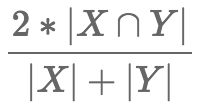

In [ ]:
def Dice_score(ground_truth,predict_mask, smooth = 0.001):
  intersection = np.logical_and(ground_truth, predict_mask)
  #axes = (1,2) # W,H axes of each image
  #intersection = np.sum(np.abs(ground_truth * predict_mask))
  # mask_sum = np.sum(np.abs(ground_truth)) + np.sum(np.abs(predict_mask)) #, axis=axes
  mask_sum = np.sum(np.abs(ground_truth)) + np.sum(np.abs(predict_mask)) #, axis=axes
  Dice_score = (2*np.sum(intersection)) / (mask_sum)
  return Dice_score

Dice_scores = []
for i in range(len(predict_masks)):
  predict_mask = cv2.imread(predict_mask_path + predict_masks[i], cv2.IMREAD_GRAYSCALE)
  ground_truth = cv2.imread(ground_truth_path + ground_truths[i], cv2.IMREAD_GRAYSCALE)
  Dice_scores.append(Dice_score(ground_truth,predict_mask))

print(Dice_scores)

print(sum(Dice_scores)/len(predict_masks))

[0.003895642083301314, 0.0038790015277963747, 0.003899646606896557, 0.003915984054833888, 0.003890510545546953, 0.0039058318565741122, 0.0039050425746801464, 0.00391351897918667, 0.003917507428100318, 0.003911086859510734, 0.0039086978681279775, 0.00389671846587197, 0.0039081386590641455, 0.003912433921636099, 0.0038927318969102223, 0.003907826677169594, 0.003913115279540115, 0.003897585316888943, 0.003900563719317455, 0.003907084929598278, 0.0038965737534423454, 0.0039034129988561564, 0.003909532443920508, 0.003908148703410184, 0.003905207950688838, 0.003914726688952923, 0.003904776166666051, 0.003915016045147726, 0.003885832266970027, 0.003880125621191412, 0.003908700609579446, 0.0039051736151517634, 0.0039160041983051395, 0.0039120134760158645, 0.003915440447933815, 0.003917711140066964, 0.003925516026425506, 0.003884291798259322, 0.0038967341606220003, 0.003915235890438233, 0.0039008189996686433, 0.003921332907144107, 0.0039106797082223525, 0.003910506257723631, 0.00391347211096741

In [ ]:
import keras.backend as K

def dice_coeff(y_true,y_pred):
    y_true_f = K.flatten(y_true)
    #y_pred_f = K.cast(K.greater(K.flatten(y_pred),0.5),'float32')
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    dice_coeff = (intersection * 2) / (K.sum(y_true_f) + K.sum(y_pred_f))
    return dice_coeff

Dice_scores = []
for i in range(len(predict_masks)):
  predict_mask = cv2.imread(predict_mask_path + predict_masks[i], cv2.IMREAD_GRAYSCALE)
  ground_truth = cv2.imread(ground_truth_path + ground_truths[i], cv2.IMREAD_GRAYSCALE)
  Dice_scores.append(dice_coeff(ground_truth,predict_mask))

# print(Dice_scores)
# print(sum(Dice_scores)/len(predict_masks))


[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
231877
110718218


In [3]:
def normalize(ground_truth):
  ground_truth[ground_truth > 0] = 255.
  np.unique(ground_truth/255., return_counts = True)
  ground_truth = np.ravel(ground_truth)
  return ground_truth

In [10]:
# print(np.sum(np.logical_and(ground_truth, predict_mask)))
# print(2*np.sum(np.logical_and(ground_truth, predict_mask)))
# union =  np.sum(np.logical_or(ground_truth, predict_mask))
# print(union)
#mask_sum = np.sum(normalize(ground_truth)) + np.sum(normalize(predict_mask)) #, axis=axes
#print(mask_sum)
predict_mask = cv2.imread(predict_mask_path + predict_masks[0], cv2.IMREAD_GRAYSCALE)
ground_truth = cv2.imread(ground_truth_path + ground_truths[0], cv2.IMREAD_GRAYSCALE)
from sklearn.metrics import classification_report
# # f1_score(np.ravel(ground_truth), np.ravel(predict_mask), average=None)
classification_report(normalize(ground_truth), normalize(predict_mask), output_dict = True)

{'0': {'f1-score': 0.9881337620857178,
  'precision': 0.9999832489984833,
  'recall': 0.9765618118351147,
  'support': 794686},
 '255': {'f1-score': 0.9645910944864389,
  'precision': 0.9316484589160486,
  'recall': 0.9999487967229903,
  'support': 253890},
 'accuracy': 0.9822244644165039,
 'macro avg': {'f1-score': 0.9763624282860783,
  'precision': 0.965815853957266,
  'recall': 0.9882553042790525,
  'support': 1048576},
 'weighted avg': {'f1-score': 0.982433414302838,
  'precision': 0.9834374575117152,
  'recall': 0.9822244644165039,
  'support': 1048576}}

In [ ]:
def dice_coef2(y_true, y_pred):
    y_true_f = y_true #.flatten()
    y_pred_f = y_pred #.flatten()
    union = np.sum(y_true_f) + np.sum(y_pred_f)
    if union==0: return 1
    intersection = np.sum(y_true_f * y_pred_f)
    return 2. * intersection / union

dice_coef2(ground_truth, predict_masks)

TypeError: ignored

In [ ]:
from sklearn.metrics import classification_report

for i in range(1): #len(predict_masks)
  predict_mask = cv2.imread(predict_mask_path + predict_masks[i], cv2.IMREAD_GRAYSCALE)
  ground_truth = cv2.imread(ground_truth_path + ground_truths[i], cv2.IMREAD_GRAYSCALE)
  print(classification_report(ground_truth.flatten(),predict_mask.flatten()))



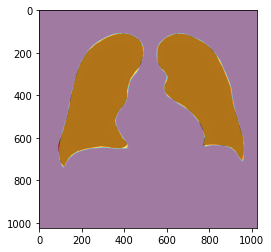

In [ ]:
plt.imshow(predict_mask)
plt.imshow(ground_truth, cmap="Reds", alpha=0.5)

# EVALUATION Ver.2

In [ ]:
predict_mask_path = "/content/drive/MyDrive/Vin Deep Learning/Demo  Montgomery County and Shenzhen Hospital/data/Montgomery Predicted Masks/"
GT_Left_path = "/content/drive/MyDrive/Vin Deep Learning/Demo  Montgomery County and Shenzhen Hospital/data/NLM-MontgomeryCXRSet/MontgomerySet/ManualMask/leftMask/"
GT_Right_path = "/content/drive/MyDrive/Vin Deep Learning/Demo  Montgomery County and Shenzhen Hospital/data/NLM-MontgomeryCXRSet/MontgomerySet/ManualMask/rightMask/"
xray_image_path = "/content/drive/MyDrive/Vin Deep Learning/Demo  Montgomery County and Shenzhen Hospital/data/NLM-MontgomeryCXRSet/MontgomerySet/CXR_png/"

In [ ]:
predict_masks = os.listdir(predict_mask_path)
GT_left = os.listdir(GT_Left_path)
GT_right = os.listdir(GT_Right_path) 
xray_images = os.listdir(xray_image_path)
predict_masks.sort()
GT_left.sort()
GT_right.sort()
xray_images.sort()


In [ ]:
predict_mask1 = cv2.imread(predict_mask_path + predict_masks[0], cv2.IMREAD_GRAYSCALE)
GT_left1 = cv2.imread(GT_Left_path + GT_left[0], cv2.IMREAD_GRAYSCALE)
GT_right1 = cv2.imread(GT_Right_path + GT_right[0], cv2.IMREAD_GRAYSCALE)

xray_image1 = cv2.imread(xray_image_path + xray_images[0], cv2.IMREAD_GRAYSCALE)
predict_mask1 = cv2.resize(predict_mask1,(4892,4020))
print(predict_mask1.shape)
print(GT_left1.shape)
print(GT_right1.shape)

print(xray_image1.shape)


(4020, 4892)
(4020, 4892)
(4020, 4892)
(4020, 4892)


In [ ]:
predict_mask1 = cv2.resize(predict_mask1,(4892,4020))

print(predict_mask1.shape)


(4020, 4892)


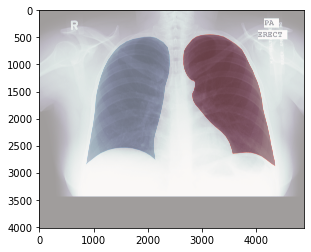

In [ ]:
plt.imshow(xray_image1, cmap="bone")
plt.imshow(GT_left1, cmap="Blues", alpha = 0.4)
plt.imshow(GT_right1, cmap = "Reds", alpha = 0.4)

In [ ]:
print(GT_left[0])
print(GT_right[0])
print(xray_images[0])

MCUCXR_0001_0.png
MCUCXR_0001_0.png
MCUCXR_0001_0.png


In [ ]:
GT_left[0]

'MCUCXR_0001_0.png'